# Post-Processing Example 3 - Extracting Depth Maps from GemPy Models

This post-processing example shows how to export depth maps created from GemPy Models to ZMAP Grids, which can be imported as rasters in QGIS.

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip or conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries

In [2]:
import numpy as np
import pyvista as pv
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Plotting Meshes

The meshes and colors of the meshes were exported from example 5 and will now be used for this example.



In [3]:
mesh1 = pv.read('../data/postproc3_zmaps/mesh1.vtk')
mesh1

PolyData (0x1eb7ff32220)
  N Cells:	12799
  N Points:	6765
  X Bounds:	4.250e+02, 3.922e+03
  Y Bounds:	1.355e+01, 2.615e+03
  Z Bounds:	2.374e+02, 7.180e+02
  N Arrays:	1

In [4]:
mesh2 = pv.read('../data/postproc3_zmaps/mesh2.vtk')
mesh2

PolyData (0x1eb7ff32700)
  N Cells:	29559
  N Points:	15359
  X Bounds:	4.587e+01, 3.922e+03
  Y Bounds:	1.355e+01, 2.696e+03
  Z Bounds:	-4.334e+01, 7.420e+02
  N Arrays:	1

In [5]:
colors = f = open('../data/postproc3_zmaps/colors.txt', "r")
colors = colors.read().split("\n")[:2]
colors 

['#9f0052', '#015482']

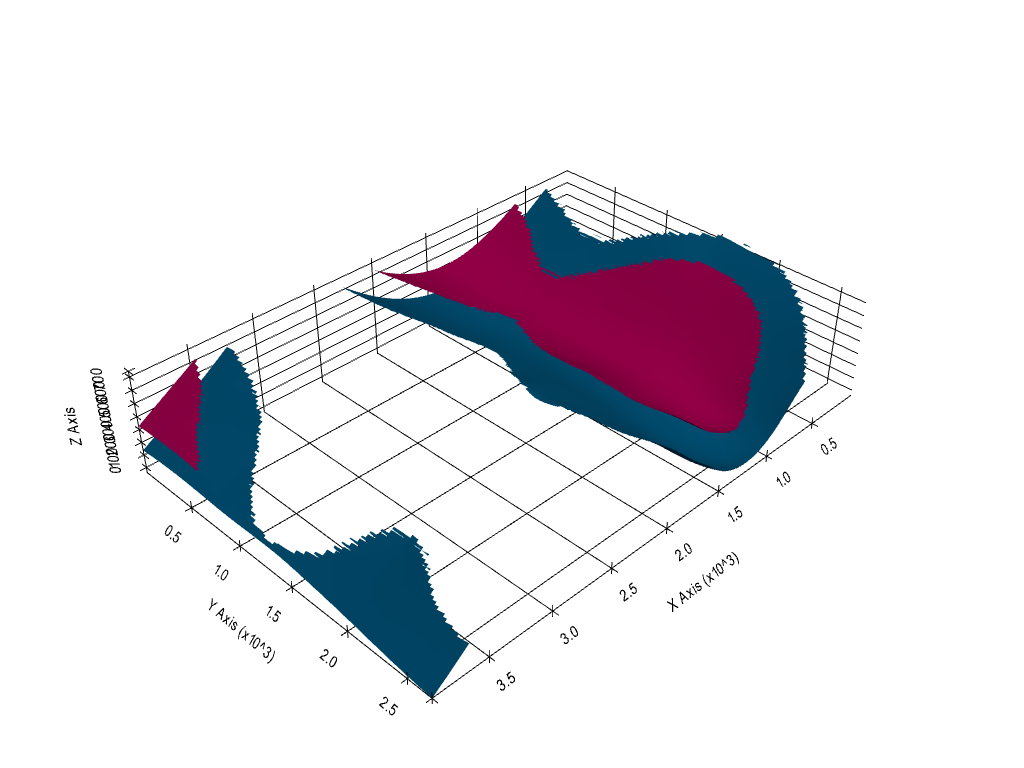

In [6]:
p = pv.Plotter(notebook=True)

p.add_mesh(mesh1, color=colors[0])
p.add_mesh(mesh2, color=colors[1])

p.show_grid(color= 'black')
p.set_background('white')
p.show()

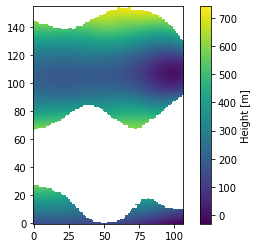

In [7]:
z_values = gg.utils.extract_zmap_data(surface=mesh2,
                                      cell_width=25)

z_values[z_values == -9999] = np.nan
im = plt.imshow(np.flipud(z_values.T), cmap='viridis')
plt.gca().invert_yaxis()
cbar = plt.colorbar(im)
cbar.set_label('Height [m]')

In [8]:
zmap_grid = gg.utils.create_zmap_grid(surface=mesh2,
                                      cell_width=25, comments=['Unit B'], nodata=-9999
                     )
zmap_grid

['!',
 '! This ZMAP Grid was created using the GemGIS Package',
 '! See https://github.com/cgre-aachen/gemgis for more information',
 '!',
 '! Unit B',
 '!',
 '@ZMAP_Grid, GRID, 5',
 '15, -9999, , 5, 1',
 '107, 155, 45.86917887568474, 3922.2900000000004, 13.55, 2696.4500000000003',
 '0.0, 0.0, 0.0',
 '@',
 '    -9999.00000    -9999.00000    -9999.00000    -9999.00000    -9999.00000',
 '    -9999.00000    -9999.00000    -9999.00000    -9999.00000      633.26379',
 '      617.46027      601.52454      585.52997      569.54010      553.60852',
 '      537.82336      522.14001      506.66763      491.40558      476.28464',
 '      461.52209      446.92685      432.55759      418.56165      404.75784',
 '      391.28336      378.19830      365.33374      352.99344      341.00980',
 '      329.29178      318.26498      307.54691      297.24185      287.58737',
 '      278.27783      269.56070      261.40646      253.62149      246.59821',
 '      240.04536      233.91373      228.66660      

In [9]:
gg.utils.save_zmap_grid(zmap_grid, path='../data/postproc3_zmaps/ZMAP_Grid.dat')

ZMAP Grid successfully saved to file
